## 0. Creación del dataset

In [27]:
import pandas as pd
import numpy as np

path_normal = '/content/drive/MyDrive/Proyecto Desarrollo en Aplicaciones con Visión Artificial/COVID-19_Radiography_Dataset2/Normal.metadata.xlsx'
path_covid = '/content/drive/MyDrive/Proyecto Desarrollo en Aplicaciones con Visión Artificial/COVID-19_Radiography_Dataset2/COVID.metadata.xlsx'

df_normal = pd.read_excel(path_normal)
df_covid = pd.read_excel(path_covid)

In [28]:
df_normal.drop(['FORMAT', 'SIZE', 'URL'], inplace=True, axis=1)
df_covid.drop(['FORMAT', 'SIZE', 'URL'], inplace=True, axis=1)
df_normal['TYPE'] = 'Normal'
df_covid['TYPE'] = 'Covid'

In [29]:
df_normal.head()

,FILE NAME,TYPE
0,NORMAL-1,Normal
1,NORMAL-2,Normal
2,NORMAL-3,Normal
3,NORMAL-4,Normal
4,NORMAL-5,Normal


In [30]:
df_covid.head()

,FILE NAME,TYPE
0,COVID-1,Covid
1,COVID-2,Covid
2,COVID-3,Covid
3,COVID-4,Covid
4,COVID-5,Covid


In [31]:
print('Normal images: ', df_normal.shape)
print('Covid images: ', df_covid.shape)

Normal images:  (10192, 2)
Covid images:  (3616, 2)


In [32]:
df_normal = df_normal.sample(n = df_covid.shape[0])
print('Normal images: ', df_normal.shape)
print('Covid images: ', df_covid.shape)

Normal images:  (3616, 2)
Covid images:  (3616, 2)


In [33]:
df_total = pd.concat([df_normal, df_covid])
df_total = df_total.reset_index(drop=True)
print('Total images: ', df_total.shape[0])

Total images:  7232


In [34]:
for i in range(df_total.shape[0]):
  if df_total['TYPE'][i] == 'Normal':
    df_total['FILE NAME'][i] = '/' + df_total['FILE NAME'][i].capitalize() + '.png'
  elif df_total['TYPE'][i] == 'Covid':
    df_total['FILE NAME'][i] = '/' + df_total['FILE NAME'][i] + '.png'
df_total.head()

,FILE NAME,TYPE
0,/Normal-6393.png,Normal
1,/Normal-954.png,Normal
2,/Normal-2434.png,Normal
3,/Normal-5137.png,Normal
4,/Normal-9208.png,Normal


In [35]:
# El resultado final buscado es el siguiente:
states_dict = {'Normal': 0, 'Covid': 1}

In [36]:
from sklearn.model_selection import train_test_split

rnd_seed = 0
df_train, df_test = train_test_split(df_total, test_size=0.2, random_state=rnd_seed)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
df_train['TYPE'].value_counts()

Normal    2906
Covid     2879
Name: TYPE, dtype: int64

In [38]:
df_test['TYPE'].value_counts()

Covid     737
Normal    710
Name: TYPE, dtype: int64

In [39]:
%cd '/content/drive/MyDrive/Proyecto Desarrollo en Aplicaciones con Visión Artificial'
covid_img_path = '/COVID-19_Radiography_Dataset2/COVID'
normal_img_path = '/COVID-19_Radiography_Dataset2/Normal'

/content/drive/.shortcut-targets-by-id/14LYEI5Mo5p_F1fHhFIjh04RTmjbpVPL9/Proyecto Desarrollo en Aplicaciones con Visión Artificial


In [42]:
import os
import shutil

path = os.getcwd()
path_train_0 = '/COVID-19_Dataset2/Train/0'
path_train_1 = '/COVID-19_Dataset2/Train/1'
path_test_0 = '/COVID-19_Dataset2/Test/0'
path_test_1 = '/COVID-19_Dataset2/Test/1'

for i in range(df_train.shape[0]):
  path_img = df_train['FILE NAME'][i]
  type_img = df_train['TYPE'][i]
  if type_img == 'Normal':
    shutil.copy(path + '/COVID-19_Radiography_Dataset2/Normal' + path_img, path + path_train_0)
  elif type_img == 'Covid':
    shutil.copy(path + '/COVID-19_Radiography_Dataset2/COVID' + path_img, path + path_train_1)

for i in range(df_test.shape[0]):
  path_img = df_test['FILE NAME'][i]
  type_img = df_test['TYPE'][i]
  if type_img == 'Normal':
    shutil.copy(path + '/COVID-19_Radiography_Dataset2/Normal' + path_img, path + path_test_0)
  elif type_img == 'Covid':
    shutil.copy(path + '/COVID-19_Radiography_Dataset2/COVID' + path_img, path + path_test_1)

In [43]:
print(len(os.listdir('./' + path_train_0)))
print(len(os.listdir('./' + path_train_1)))
print(len(os.listdir('./' + path_test_0)))
print(len(os.listdir('./' + path_test_1)))

2906
2879
710
737


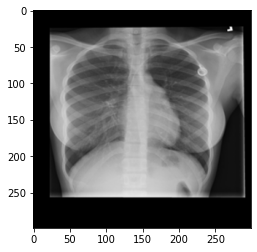

In [46]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

img = plt.imread('.' + path_train_0 + '/Normal-1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))